**1**. 15 points

The MNIST data set needs to be downloaded from https://pjreddie.com/media/files/mnist_train.csv and https://pjreddie.com/media/files/mnist_test.csv and put in the data sub-directory first.

- Load the training and test MNIST digits data sets from `data/mnist_train.csv` and `data/mnist_test.csv`, and split into labels (column 0) and features (all other columns). 
- Each row is a vector of length 784 with values between 0 (black) and 255 (white) on the gray color scale. 
- Display the 3rd vector in the training set as a $28 \times 28$ image using `matplotlib`, using a helper function that plots an image and its corresponding label in the title given its row number, the feature matrix and the label vector.

In [106]:
import pandas as pd
import numpy as np

In [107]:
#load data
train = pd.read_csv('data/mnist_train.csv',header = None)
test = pd.read_csv('data/mnist_test.csv',header = None)

In [109]:
#split into labels and features
train_label = train[[0]]
train_features = train.iloc[:,1:]
test_label = test[[0]]
test_festure = test.iloc[:,1:]

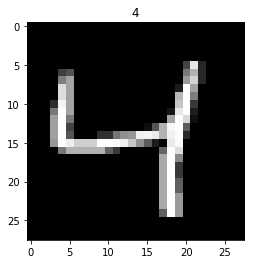

In [110]:
#display the 3rd vector
import matplotlib.pyplot as plt

def helper(row,feature_matrix,label):
    vec = np.array(feature_matrix.iloc[row]).reshape([28,28])
    fig = plt.figure()
    plt.imshow(vec, cmap='gray')
    plt.title(train_label.iloc[label][0])
    plt.show()

helper(2,train_features,2)

**2**. 20 points

- Use PCA to reduce the number of dimensions of the training data set so that it includes just above 90% of the total variance. Remember to scale the data before doing PCA.
- How many components are used?
- Reconstruct the training set from the dimension-reduced one. Do this without using the `inverse_transform` method (you can use this to check your solution)
- Show the image of the reconstructed data set for the vector in the third row.

In [111]:
X = np.array(train_features).T

In [112]:
mean = np.mean(X, axis=1).reshape(-1, 1)
std = np.std(X, axis=1).reshape(-1, 1)
X_scaled = np.nan_to_num((X - mean)/std)
X_scaled

/opt/conda/lib/python3.5/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [113]:
#covariance matrix
#train_s: each row is an observation，need to be transposed
cov = np.cov(X_scaled) #cov will automatically center data
cov #784*784

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [114]:
#eigendecomposition
import numpy.linalg as la
e,v = la.eigh(cov)
idx = np.argsort(e)[::-1] #sort the eigenvalue
e = e[idx] #sorting
v = v[:,idx]

In [115]:
#chose n components to include over 90% of total variance
def choseComponents(threshold,e):
    sum_variance = 0
    for i in range(len(e)):
        sum_variance +=(e[i]/e.sum())
        if sum_variance>threshold:
            return i
        
n = choseComponents(0.9,e)
n
#236 components are used

235

In [116]:
#reconstruct the training set from the dimension-reduced one
v_n = v[:,:n+1] #784*87，need to transposed to so that a row is a vector
train_reduced = X_scaled.T@v_n
A = np.diag(e[:n+1])
train_reconstruct = train_reduced@v_n.T
print('reduced:',train_reduced)
print('reconstruct:',train_reconstruct)

reduced: [[ 9.22158806e-01 -4.81479035e+00 -6.75598364e-02 ...  1.11448517e+00
   1.22286197e+00  1.34524760e+00]
 [-8.70897698e+00 -7.75440302e+00  3.44791044e+00 ...  3.26260872e-04
   1.10382968e-01  3.83387792e-01]
 [-2.32838932e+00  9.43133817e+00  6.18411405e+00 ... -5.10907139e-01
   1.25670300e-01  7.16851330e-01]
 ...
 [ 3.77721201e+00 -3.23056436e+00  3.80619883e+00 ... -4.21868019e-01
   9.36909294e-01 -4.71188363e-01]
 [-1.72236917e+00 -4.94812525e+00 -6.95122764e-03 ...  4.03964433e-02
  -4.63424193e-01  6.67381828e-01]
 [ 1.42725062e+00 -6.17538558e+00  2.96768709e+00 ...  9.69108448e-01
  -8.78679278e-01  2.98589204e-01]]
reconstruct: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [117]:
X_scaled.shape,v_n.shape

((784, 60000), (784, 236))

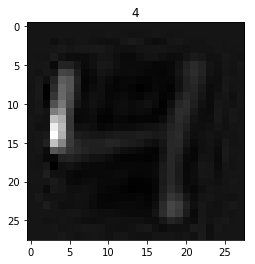

In [118]:
#Show the image of the reconstructed data set for the vector in the third row.
helper(2,pd.DataFrame(train_reconstruct),2)

**3**. 15 points
 
- Using the test dataset, first use PCA to reduce the dimensionality from 784 to 50. Remember to scale the data before doing PCA.
- Now use TSNE to further reduce the 50 dimensional data set to 2. 
- Plot a scatter plot of the data, coloring each point by its label. 
- Create a legend for the plot showing what color points go with what label

(Note: The TSNE transform will take a few minutes - go have coffee.)

In [119]:
#PCA to reduce the dimensionality from 785 to 50
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
test_s = scaler.fit_transform(test_festure)
#test_s
pca = PCA(n_components=50)
X = pca.fit_transform(test_s)

In [120]:
#TSNE to further reduce the 50 dimensional data set to 2
from sklearn.manifold import TSNE
tsne = TSNE(n_components = 2)
ts = tsne.fit_transform(X)

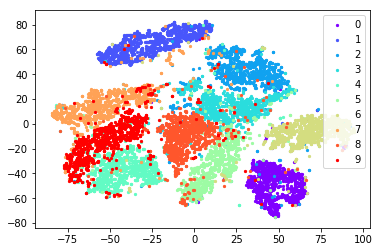

In [121]:
#plot the scatter
import matplotlib.cm as cm

colors = cm.rainbow(np.linspace(0, 1, 10)) # generate 10 colors
ts_df = pd.DataFrame(ts)
ts_df = ts_df.rename(columns={0:'tsn0',1:'tsn1'})
test_label = test_label.rename(columns={0:'label'}) #rename the label
plot_df = pd.concat([ts_df,test_label], axis=1)

fig, ax = plt.subplots()
for i in range(10):
    temp =  plot_df[plot_df['label']==i] # find all the indexes for each digit (0 - 9)
    ax.scatter(temp['tsn0'], temp['tsn1'], c=colors[i], label=i, s=5) # plot each digit
ax.legend()

**4**. 50 points

- Implement the k-means++ algorithm from the description given at https://en.wikipedia.org/wiki/K-means%2B%2B (summarized below)
- Use k-means++ to initialize a k-means clustering of the TsNE 2-dimensional data, using your own code (i.e. do not use `scikit-learn` or similar libraries for this)
- Align the true labels and the k-means labels and show the two TSNE plots side-by-side with coloring of points by label values

K-means++ algorithm to initialize centers

- Choose one center uniformly at random from among the data points.
- For each data point x, compute D(x), the distance between x and the nearest center that has already been chosen.
- Choose one new data point at random as a new center, using a weighted probability distribution where a point x is chosen with probability proportional to D(x)2.
- Repeat Steps 2 and 3 until k centers have been chosen.
- Now that the initial centers have been chosen, proceed using standard k-means clustering.

In [187]:
def distance(vecA, vecB):
    #use the distance^2
    dist = (vecA - vecB) @ (vecA - vecB).T
    return dist

In [188]:
def nearest(point, cluster_centers):
    min_dist = np.infty
    m = np.shape(cluster_centers)[0] #m means the number of centers
    for i in range(m):
        #calculate the distance between data point centers
        d = distance(point, cluster_centers[i,])
        #choose the min distance
        if min_dist>d:
            min_dist=d
    return min_dist

In [207]:
from random import random
np.random.seed(10000)
def get_centroids(points, k):
    m,n = np.shape(points)
    #cluster_centers = np.mat(np.zeros((k,n)))
    cluster_centers = np.zeros((k,n))
    #choose the first centroid randomly
    index = np.random.randint(0,m)
    cluster_centers[0,] = np.copy(points[index,])
    #initialize the distance array 
    d = [0.0 for _ in range(m)]
    
    for i in range(1,k):
        sum_all = 0
        for j in range(m):
            #find the nearest center for each data point
            #find the nearest distance to centers
            d[j] = nearest(points[j,], cluster_centers[0:i,])
            #sum up all the nearest distance
            sum_all+=d[j]
        #generate a random value below sum_all, avoid noise
        sum_all *= random()
        #make the data point with the largest distance as the next centroid
        for j,di in enumerate(d):
            sum_all -= di
            if sum_all>0:
                continue
            cluster_centers[i] = np.copy(points[j,])
            break
    return cluster_centers

In [208]:
get_centroids(ts, 10)

array([[ 14.06819439,  57.72579193],
       [ 61.07859802,  -4.7883091 ],
       [-65.59725952, -31.70197105],
       [  8.54644585,  -4.05443382],
       [ 37.69403839, -31.33251572],
       [-12.36847878,  28.41255569],
       [-32.35776138,  51.28904343],
       [ 41.56256485,  44.49777603],
       [  8.11481285,  30.87834167],
       [ 53.02582169,  25.77133369]])

In [209]:
initial_centers = get_centroids(ts, 10)

In [210]:
from scipy.spatial.distance import cdist
def KMeans(X, centers,k, tol = 1e-20):
    #K-means with tolerance
    r,c = X.shape
    delta = np.infty
    while delta > tol:
        m = cdist(X, centers)
        z = np.argmin(m, axis=1)
        new_centers = np.array([np.mean(X[z==i],axis=0) for i in range(k)])
        delta = np.sum((new_centers - centers)**2)
        centers = new_centers
    return (z,centers)

In [211]:
K_label = KMeans(ts, initial_centers,10)[0]
K_centers = KMeans(ts, initial_centers,10)[1]
print('labels',K_label)
print('centers',K_centers)

labels [8 7 1 ... 2 0 4]
centers [[  0.31558204 -37.070774  ]
 [-24.227066    64.92884   ]
 [-52.42507    -37.46347   ]
 [ 48.047607   -49.63936   ]
 [ 69.406815    -6.286408  ]
 [ -4.492622     7.215954  ]
 [ 26.10249      4.8712683 ]
 [ 31.360931    43.08197   ]
 [-54.694107    15.034145  ]
 [-46.842342    -9.494591  ]]


In [212]:
K_label = pd.DataFrame(K_label).rename(columns={0:'KMeans_label'})
K_df = pd.concat([plot_df,pd.DataFrame(K_label)],axis=1)

In [213]:
original_centers = np.zeros((K_centers.shape[0],K_centers.shape[1]))
for i in range(K_centers.shape[0]):
    k_temp = K_df[K_df['label']==i]
    original_centers[i,]=np.mean(k_temp['tsn0']),np.mean(k_temp['tsn1'])
original_centers

array([[ 47.72078323, -48.48868942],
       [-24.1387291 ,  64.80015564],
       [ 27.76055145,  39.92188644],
       [ 19.54839897,  14.97729588],
       [-40.06838226, -34.53330231],
       [ 11.47428989, -32.73633957],
       [ 66.159729  ,  -6.54328394],
       [-51.71255112,  14.97311687],
       [ -4.70381498, -10.84982204],
       [-49.96720123, -13.37186241]])

In [214]:
#match the cluster labels to original labels
from scipy.optimize import linear_sum_assignment
cost = cdist(original_centers, K_centers)
row_ind, col_ind = linear_sum_assignment(cost)
row_ind, col_ind

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([3, 1, 7, 6, 2, 0, 4, 8, 5, 9]))

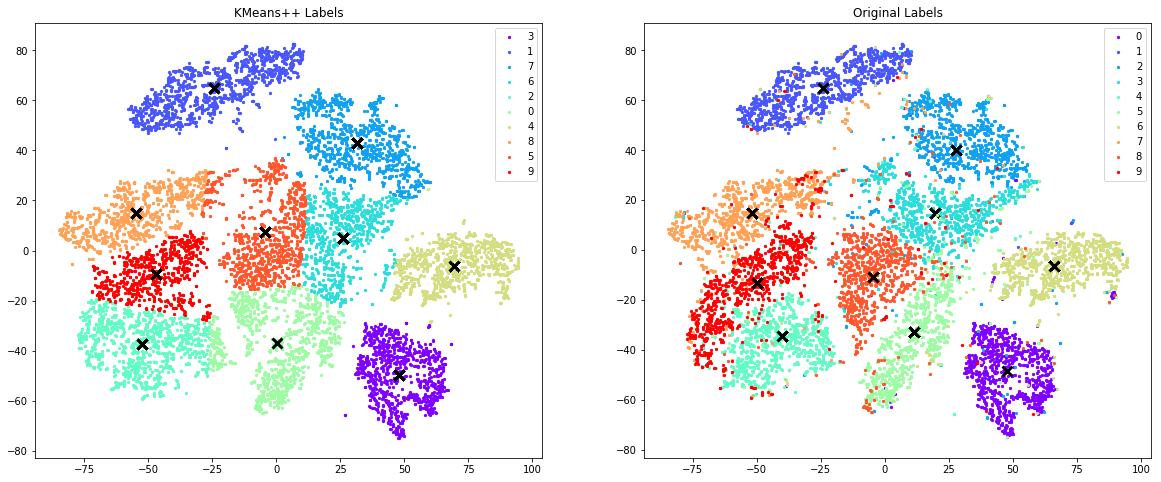

In [215]:
#make the plot
fig, ax = plt.subplots(1,2, figsize=(20,8))
#KMeans plot

for i in range(10):
    temp =  K_df[K_df['KMeans_label']==col_ind[i]] # find all the indexes for each digit (0 - 9)
    ax[0].scatter(temp['tsn0'], temp['tsn1'], c=colors[i], label=col_ind[i], s=5) # plot each digit
    ax[0].scatter(K_centers[col_ind[i]:, 0], K_centers[col_ind[i]:, 1], marker='x', linewidth=3, s=100, c='black')
ax[0].set_title('KMeans++ Labels')
ax[0].legend()
#original plot
for i in range(10):
    temp =  K_df[K_df['label']==i] # find all the indexes for each digit (0 - 9)
    ax[1].scatter(temp['tsn0'], temp['tsn1'], c=colors[i], label=i, s=5) # plot each digit
    ax[1].scatter(original_centers[i:, 0], original_centers[i:, 1], marker='x', linewidth=3, s=100, c='black')
ax[1].set_title('Original Labels')
ax[1].legend()
plt.show()